In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from sklearn.metrics import classification_report

# CNN
## 10/02/2024

In [ ]:
data = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [ ]:
type(data),type(data[0]),type(data[0][0])

(tuple, tuple, numpy.ndarray)

In [ ]:
(X_train, y_train), (X_test, y_test) = data
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [ ]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [ ]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

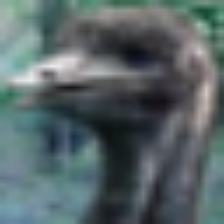

In [ ]:
cv2_imshow(cv2.resize(X_train[46000],(224,224)))

In [ ]:
y_train[46000]

2

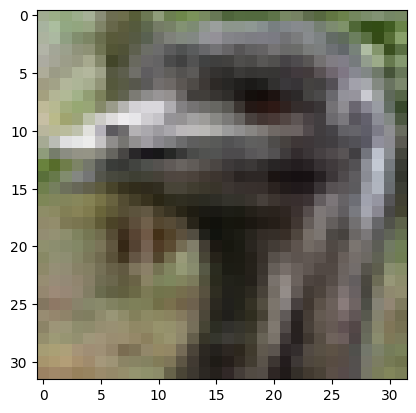

In [ ]:
plt.imshow(X_train[46000])

In [ ]:
def display_img(X, y, index):
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

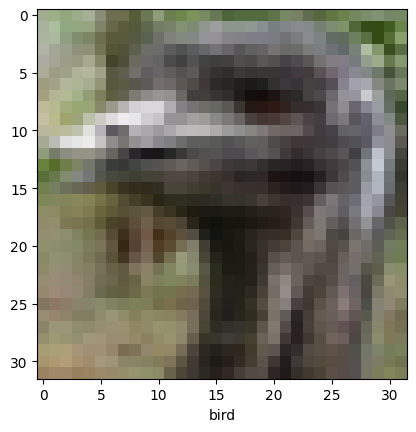

In [ ]:
display_img(X_train, y_train, 46000)

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
ann_model = keras.Sequential([keras.layers.Flatten(input_shape = (32,32,3)),
                              keras.layers.Dense(1024,activation='relu'),
                              keras.layers.Dense(512,activation='relu'),
                              keras.layers.Dense(10,activation='softmax')
                              ])

ann_model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

ann_model.fit(X_train,y_train,epochs=100,batch_size=100)

Epoch 1/100
500/500 [==============================] - 4s 4ms/step - loss: 1.9090 - accuracy: 0.3202
Epoch 2/100
500/500 [==============================] - 2s 4ms/step - loss: 1.6662 - accuracy: 0.4048
Epoch 3/100
500/500 [==============================] - 2s 3ms/step - loss: 1.5761 - accuracy: 0.4365
Epoch 4/100
500/500 [==============================] - 2s 3ms/step - loss: 1.5158 - accuracy: 0.4584
Epoch 5/100
500/500 [==============================] - 2s 3ms/step - loss: 1.4718 - accuracy: 0.4751
Epoch 6/100
500/500 [==============================] - 2s 3ms/step - loss: 1.4295 - accuracy: 0.4899
Epoch 7/100
500/500 [==============================] - 2s 4ms/step - loss: 1.4035 - accuracy: 0.4976
Epoch 8/100
500/500 [==============================] - 2s 5ms/step - loss: 1.3663 - accuracy: 0.5138
Epoch 9/100
500/500 [==============================] - 2s 4ms/step - loss: 1.3436 - accuracy: 0.5206
Epoch 10/100
500/500 [==============================] - 2s 4ms/step - loss: 1.3154 - accura

In [ ]:
ann_model.evaluate(X_train,y_train)

1563/1563 [==============================] - 4s 2ms/step - loss: 0.4156 - accuracy: 0.8506


[0.41564664244651794, 0.8506399989128113]

In [ ]:
y_pred = ann_model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_pred = [np.argmax(i) for i in y_pred]

In [ ]:

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.58      0.58      0.58       991
           1       0.56      0.64      0.60       883
           2       0.41      0.36      0.39      1133
           3       0.34      0.33      0.33      1034
           4       0.37      0.42      0.40       885
           5       0.46      0.36      0.40      1276
           6       0.48      0.56      0.51       849
           7       0.54      0.55      0.55       975
           8       0.65      0.62      0.63      1039
           9       0.53      0.57      0.55       935

    accuracy                           0.49     10000
   macro avg       0.49      0.50      0.49     10000
weighted avg       0.49      0.49      0.49     10000



Enter any number between 1-10000: 489
ship


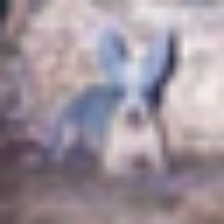

In [ ]:
n = int(input("Enter any number between 1-10000: "))
if n>0 and n<10000:
  print(classes[y_pred[n-1]])
  cv2_imshow(cv2.resize(X_test[n-1]*255,(224,224)))
else:
  print("Invalid input!!")

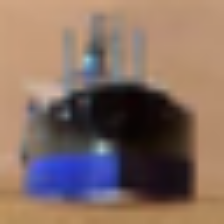

In [ ]:
X_test[9999]

array([[[0.28627451, 0.30588235, 0.29411765],
        [0.38431373, 0.40392157, 0.44313725],
        [0.38823529, 0.41568627, 0.44705882],
        ...,
        [0.52941176, 0.58823529, 0.59607843],
        [0.52941176, 0.58431373, 0.60392157],
        [0.79607843, 0.84313725, 0.8745098 ]],

       [[0.27058824, 0.28627451, 0.2745098 ],
        [0.32941176, 0.34901961, 0.38039216],
        [0.26666667, 0.29411765, 0.31764706],
        ...,
        [0.33333333, 0.37254902, 0.34901961],
        [0.27843137, 0.32156863, 0.31372549],
        [0.47058824, 0.52156863, 0.52941176]],

       [[0.27058824, 0.28627451, 0.2745098 ],
        [0.35294118, 0.37254902, 0.39215686],
        [0.24313725, 0.27843137, 0.29019608],
        ...,
        [0.29019608, 0.31764706, 0.2745098 ],
        [0.20784314, 0.24313725, 0.21176471],
        [0.24313725, 0.29019608, 0.27058824]],

       ...,

       [[0.48235294, 0.50196078, 0.37647059],
        [0.51764706, 0.51764706, 0.4       ],
        [0.50588235, 0

In [ ]:
cnn_model = keras.Sequential([#CNN
                              keras.layers.Conv2D(filters=67, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
                              keras.layers.Conv2D(filters=67, kernel_size=(3,3), activation='relu'),
                              keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
                              keras.layers.MaxPooling2D((2,2)),


                              keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
                              keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
                              keras.layers.MaxPooling2D((2,2)),

                              #ANN
                              keras.layers.Flatten(input_shape = (32,32,3)),
                              keras.layers.Dense(128,activation='relu'),
                              keras.layers.Dense(10,activation='softmax')
                              ])

cnn_model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

cnn_model.fit(X_train,y_train,epochs=20)

Epoch 1/20
1563/1563 [==============================] - 13s 7ms/step - loss: 1.5684 - accuracy: 0.4269
Epoch 2/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1824 - accuracy: 0.5762
Epoch 3/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0202 - accuracy: 0.6391
Epoch 4/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9188 - accuracy: 0.6753
Epoch 5/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8372 - accuracy: 0.7066
Epoch 6/20
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7746 - accuracy: 0.7264
Epoch 7/20
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7178 - accuracy: 0.7475
Epoch 8/20
1563/1563 [==============================] - 10s 7ms/step - loss: 0.6746 - accuracy: 0.7618
Epoch 9/20
1563/1563 [==============================] - 10s 7ms/step - loss: 0.6330 - accuracy: 0.7773
Epoch 10/20
1563/1563 [==============================] - 10s 7ms/step - l

In [ ]:
cnn_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.2320 - accuracy: 0.6836


[1.2319649457931519, 0.6836000084877014]

In [ ]:
y_pred_cnn = cnn_model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_pred_cnn = [np.argmax(i) for i in y_pred_cnn]

In [ ]:
classes[y_pred_cnn[488]]

'dog'

In [ ]:
y_pred_cnn[488]

5

In [ ]:
np.argmax(y_pred_cnn[488])

5

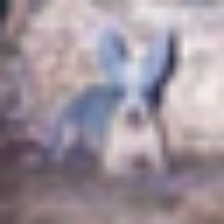

In [ ]:
cv2_imshow(cv2.resize(X_test[488]*255,(224,224)))

In [ ]:
print(classification_report(y_pred_cnn,y_test))

              precision    recall  f1-score   support

           0       0.71      0.72      0.71       980
           1       0.79      0.84      0.81       932
           2       0.57      0.54      0.55      1045
           3       0.45      0.53      0.48       841
           4       0.65      0.60      0.62      1093
           5       0.65      0.57      0.61      1133
           6       0.76      0.74      0.75      1022
           7       0.73      0.69      0.71      1048
           8       0.77      0.83      0.80       922
           9       0.78      0.79      0.79       984

    accuracy                           0.68     10000
   macro avg       0.68      0.69      0.68     10000
weighted avg       0.68      0.68      0.68     10000



Enter any number between 1-10000: 488
truck 



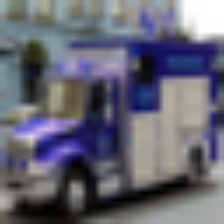

In [ ]:
n = int(input("Enter any number between 1-10000: "))
if n>0 and n<10000:
  print(classes[y_pred_cnn[n-1]])
  cv2_imshow(cv2.resize(X_test[n-1]*255,(224,224)))
else:
  print("Invalid input!!")

Enter any number between 1-10000: 588


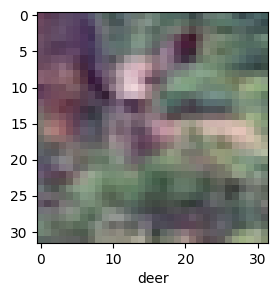

In [ ]:
n = int(input("Enter any number between 1-10000: "))
if n>0 and n<10000:
  plt.figure(figsize=(3,3))
  plt.xlabel(classes[y_pred_cnn[n-1]])
  plt.imshow(X_test[n-1])
else:
  print("Invalid input!!")